# Comparing statistical significances of composites

In [1]:
from importlib import reload
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy as ctp

from latgmm.utils import utenso, preproc, eof, utdata, utstats, metric
import latgmm.geoplot as gpl

plt.style.use("../paper.mplstyle")


In [2]:
# Load data
# =======================================================================================
reload(preproc)
vars = ['olr']
climatology = 'month'
f_sst = "../data/reanalysis/monthly/ERA5/sea_surface_temperature_era5_monthly_sp_1940-2022_1.0x1.0.nc"

datapath = {
    'sst':    f"../data/reanalysis/monthly/CERA-20C/sst_cera20c_1901-2009_r1x1.nc",
    'ssh':    f"../data/reanalysis/monthly/ORAS5/sea_surface_height_oras5_single_level_1958_2023_1x1.nc",
    't2m':    f"../data/reanalysis/monthly/ERA5/2m_temperature_era5_monthly_sp_1940-2022_2.5x2.5.nc",
    'olr':    f"../data/reanalysis/monthly/ERA5/olr_era5_monthly_sp_1940-2022_2.5x2.5.nc",
}

da4comp = {}
for var in vars:
    print(f"Load {var}")
    temp = preproc.process_data(
        datapath[var], vars=[var], antimeridian=False,
        lon_range=[-180, 179], lat_range=[-80, 80],
        grid_step=2.5, climatology=climatology, normalization=None
    )
    temp = temp[f"{var}a"]
    temp['time'] = np.array(temp['time'].data, dtype='datetime64[M]')
    da4comp[f"{var}a"] = temp


Load olr
Sort longitudes and latitudes in ascending order, respectively
Process olr:
Get selected area: lon=[-180, 179], lat=[-80, 80]!
Interpolate grid on res 2.5
Detrend and compute anomalies:


/tmp/ipykernel_11642/3829559203.py:24: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  temp['time'] = np.array(temp['time'].data, dtype='datetime64[M]')
/tmp/ipykernel_11642/3829559203.py:24: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by convert

## Unweighted composites

In [3]:
# Parameters
n_samples_mean = 1000
alpha = 0.05
null_hypothesis = 'neutral'
stattest = 'pos'

In [4]:
# Unweighted composites
reload(utenso)
multiple_testing= None
composites_unweight, mask_unweight, composites_null, samples_null_unweight, pvalues_unweight = utenso.get_unweighted_composites(
    da4comp, f_sst, stattest=stattest, null_hypothesis=null_hypothesis,
    n_samples_mean=n_samples_mean, n_samples_time=None, alpha=alpha,
    serial_data=False, multiple_testing=multiple_testing
)

Sort longitudes and latitudes in ascending order, respectively
Time points of null-hypothesis: 78
Num of datapoints Nino_EP: 36
Percentile of score for Nino_EP


100%|██████████| 9360/9360 [00:08<00:00, 1148.51it/s]


Num of datapoints Nino_CP: 24
Percentile of score for Nino_CP


100%|██████████| 9360/9360 [00:08<00:00, 1103.31it/s]


Num of datapoints Nina_EP: 45
Percentile of score for Nina_EP


100%|██████████| 9360/9360 [00:08<00:00, 1104.16it/s]


Num of datapoints Nina_CP: 30
Percentile of score for Nina_CP


100%|██████████| 9360/9360 [00:07<00:00, 1173.85it/s]


In [5]:
# Unweighted composites
reload(utenso)
multiple_testing= 'dunn'
composites_unweight_fieldcorr, mask_unweight_fieldcorr, composites_null, samples_null_unweight, pvalues_unweight = utenso.get_unweighted_composites(
    da4comp, f_sst, stattest=stattest, null_hypothesis=null_hypothesis,
    n_samples_mean=n_samples_mean, n_samples_time=None, alpha=alpha,
    serial_data=False, multiple_testing=multiple_testing
)

Sort longitudes and latitudes in ascending order, respectively
Time points of null-hypothesis: 78
Num of datapoints Nino_EP: 36
Percentile of score for Nino_EP


100%|██████████| 9360/9360 [00:08<00:00, 1146.37it/s]


Num of datapoints Nino_CP: 24
Percentile of score for Nino_CP


100%|██████████| 9360/9360 [00:07<00:00, 1190.79it/s]


Num of datapoints Nina_EP: 45
Percentile of score for Nina_EP


100%|██████████| 9360/9360 [00:07<00:00, 1221.42it/s]


Num of datapoints Nina_CP: 30
Percentile of score for Nina_CP


100%|██████████| 9360/9360 [00:07<00:00, 1188.36it/s]


/tmp/ipykernel_11642/2573509617.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../output/plots/olr_composites_unweighted_compare_multipletest.png", dpi=300, bbox_inches='tight')
/tmp/ipykernel_11642/2573509617.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../output/plots/olr_composites_unweighted_compare_multipletest.png", dpi=300, bbox_inches='tight')
/home/jakob/Software/mambaforge/envs/latgmmenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


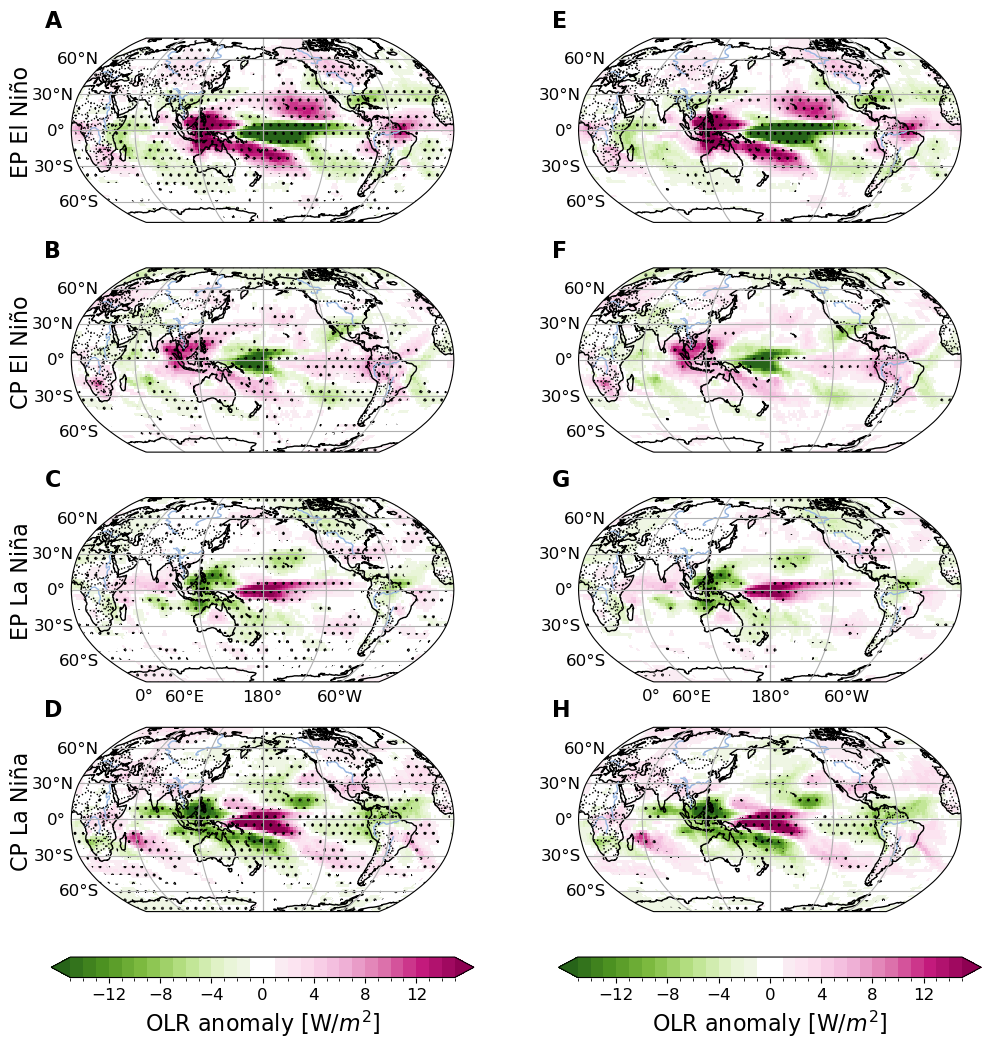

In [7]:
# Plot unweighted composites
plotspec = {
    'ssta': dict(cmap='RdBu_r', vmin=-1.5, vmax=1.5, step=.1, label='SST anomaly [K]'),
    'ssha': dict(cmap='RdGy_r', vmin=-.15, vmax=.15, step=.01, label='SSH anomaly [m]'),
    't2ma': dict(cmap='RdBu_r', vmin=None, vmax=None, step=.25, label='2m temperature anomaly'),
    'olra': dict(cmap='PiYG_r', vmin=-15, vmax=15, step=1, label=r'OLR anomaly [W/$m^2$]'),
}
labels = ["EP El Niño", "CP El Niño", "EP La Niña", "CP La Niña"]

n_columns = 2 
n_rows = len(composites_unweight['classes'])
height_ratios = [9]*(n_rows)
height_ratios.append(1)
fig = plt.figure(figsize=(n_columns*6, n_rows*3 + 0.2))
gs = fig.add_gridspec(n_rows+1, n_columns,
                      height_ratios=height_ratios,
                      hspace=0.3, wspace=0.2)
central_longitude = 180
proj = ctp.crs.Robinson(central_longitude=central_longitude)

axs = []
for j in range(n_columns):
    var = 'olra'
    mean = composites_unweight[var] if j == 0 else composites_unweight_fieldcorr[var]
    mask = mask_unweight[var] if j == 0 else mask_unweight_fieldcorr[var]

    # ENSO flavor composites
    for i in range(len(mean['classes'])):
        comp_flavor = mean.isel(classes=i)
        mask_flavor = mask.isel(classes=i)
        ax = fig.add_subplot(gs[i, j], projection=proj)

        im = gpl.plot_map(comp_flavor, central_longitude=0, ax=ax,
                          bar='discrete', add_bar=False,
                          cmap=plotspec[var]['cmap'],
                          vmin=plotspec[var]['vmin'], vmax=plotspec[var]['vmax'],
                          step=plotspec[var]['step'], centercolor='#FFFFFF')
        gpl.significance_mask(mask_flavor, ax=ax,
                              central_longitude=0)
        # Remove labels
        im['gl'].top_labels = False
        im['gl'].right_labels = False
        if i+1 == n_rows-1:
            im['gl'].bottom_labels = True
        else:
            im['gl'].bottom_labels = False

        # Set number of significant points as title
        if j ==0:
            ax.text(-0.1, 0.55, rf"{labels[i]}", va='bottom', ha='center',
                    rotation='vertical', rotation_mode='anchor',
                    transform=ax.transAxes, fontsize=16) 
        axs.append(ax)

    # Shared colorbar
    ax = fig.add_subplot(gs[-1, j])
    cbar = plt.colorbar(im['im'], orientation='horizontal', shrink=0.3,
                        cax=ax, extend='both')
    cbar.set_label(f"{plotspec[var]['label']}", size=16)

_ = gpl.enumerate_subplots(np.array(axs), pos_x=-0.07, pos_y=1.06, fontsize=16)

plt.savefig("../output/plots/olr_composites_unweighted_compare_multipletest.png", dpi=300, bbox_inches='tight')


## Probabilistic weighted composites

In [4]:
# Load weights
weight_month_mean = xr.open_dataset(
    "../output/pcgmm/pcgmm_1stpaperdraft/pcgmm_weights_month_sst.nc"
)['p_c_given_x']
gmm_order = weight_month_mean.attrs['gmm_sort']


In [11]:
# Weighted composites
reload(utenso)
multiple_testing = None 
composites_prob, mask_prob, samples_null_prob, pvals_prob = utenso.get_weighted_composites(
    ds4comp, f_sst, weight_month_mean, null_hypothesis=null_hypothesis,
    stattest=stattest, n_samples_mean=n_samples_mean, alpha=alpha,
    multiple_testing=multiple_testing, serial_data=False
)


/home/jakob/Code/LatentGMM/latgmm/utils/utenso.py:1158: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  weights['time'] = np.array(weights['time'].data, dtype='datetime64[M]')
/home/jakob/Code/LatentGMM/latgmm/utils/utenso.py:1158: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable co

Sort longitudes and latitudes in ascending order, respectively
Len of null-times: 82
Compute mean and stat-test for olra
Num of samples for null hypothesis: 109
Percentile of score for c=1


100%|██████████| 9360/9360 [00:06<00:00, 1463.21it/s]


Num of samples for null hypothesis: 69
Percentile of score for c=2


100%|██████████| 9360/9360 [00:06<00:00, 1453.28it/s]


Num of samples for null hypothesis: 11
Percentile of score for c=3


100%|██████████| 9360/9360 [00:06<00:00, 1433.70it/s]


Num of samples for null hypothesis: 88
Percentile of score for c=4


100%|██████████| 9360/9360 [00:06<00:00, 1430.65it/s]


Num of samples for null hypothesis: 110
Percentile of score for c=5


100%|██████████| 9360/9360 [00:06<00:00, 1420.69it/s]


In [12]:
# Weighted composites
multiple_testing = 'dunn'
composites_prob_fieldcorr, mask_prob_fieldcorr, samples_null_prob, pvals_prob = utenso.get_weighted_composites(
    ds4comp, f_sst, weight_month_mean, null_hypothesis=null_hypothesis,
    stattest=stattest, n_samples_mean=n_samples_mean, alpha=alpha,
    multiple_testing=multiple_testing, serial_data=False
)

/home/jakob/Code/LatentGMM/latgmm/utils/utenso.py:1158: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  weights['time'] = np.array(weights['time'].data, dtype='datetime64[M]')
/home/jakob/Code/LatentGMM/latgmm/utils/utenso.py:1158: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable co

Sort longitudes and latitudes in ascending order, respectively
Len of null-times: 82
Compute mean and stat-test for olra
Num of samples for null hypothesis: 109
Percentile of score for c=1


100%|██████████| 9360/9360 [00:06<00:00, 1391.97it/s]


Num of samples for null hypothesis: 69
Percentile of score for c=2


100%|██████████| 9360/9360 [00:06<00:00, 1397.39it/s]


Num of samples for null hypothesis: 11
Percentile of score for c=3


100%|██████████| 9360/9360 [00:07<00:00, 1273.76it/s]


Num of samples for null hypothesis: 88
Percentile of score for c=4


100%|██████████| 9360/9360 [00:07<00:00, 1319.15it/s]


Num of samples for null hypothesis: 110
Percentile of score for c=5


100%|██████████| 9360/9360 [00:07<00:00, 1312.33it/s]


/home/jakob/Software/mambaforge/envs/latgmmenv/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/jakob/Software/mambaforge/envs/latgmmenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


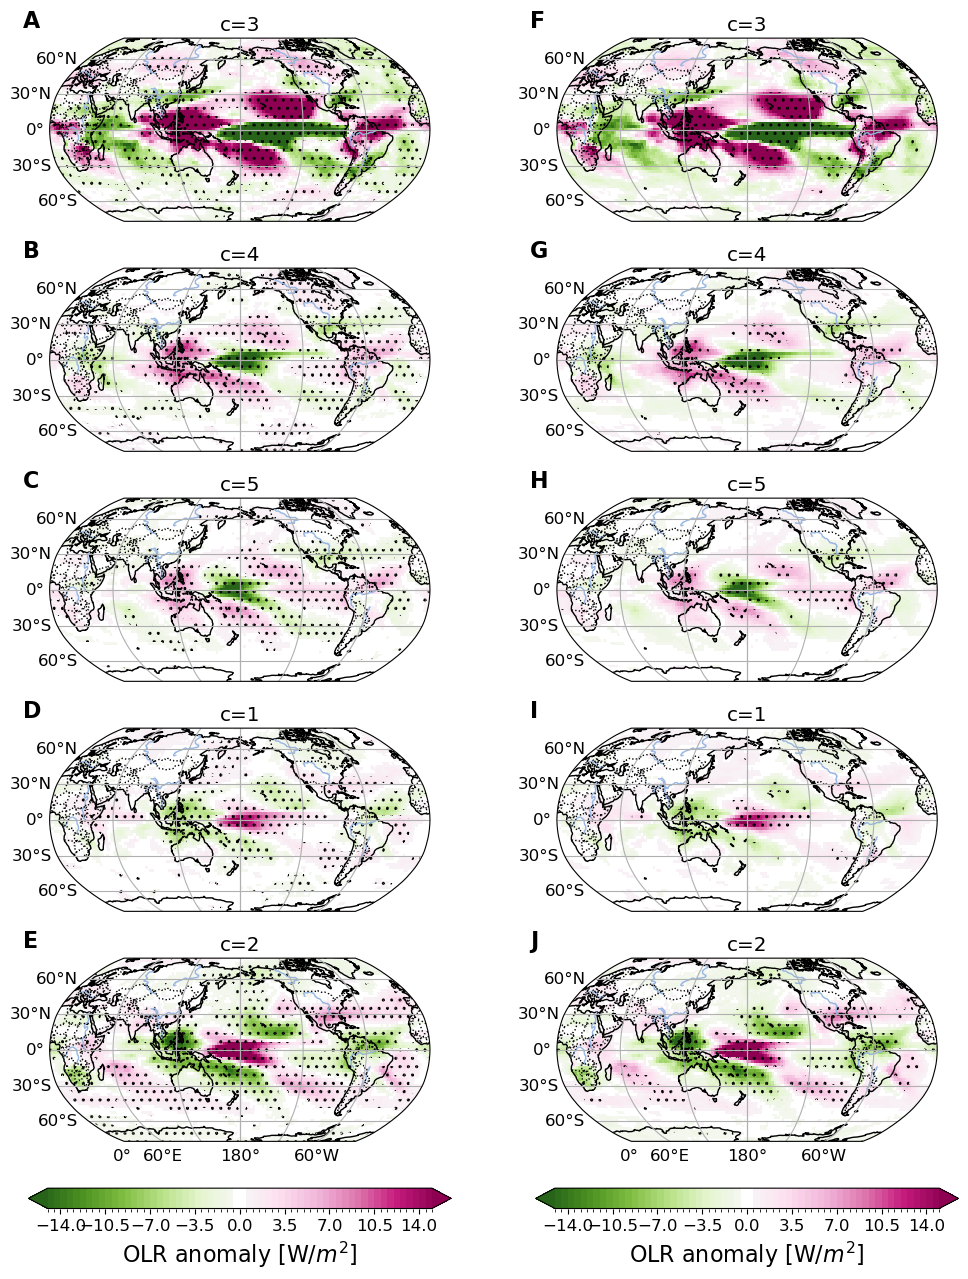

In [10]:
# Plot weighted composites
# ===============================================
plotspec = {
    'ssta': dict(cmap='RdBu_r', vmin=-1.5, vmax=1.5, step=.25, label='SST anomaly [K]'),
    'ssha': dict(cmap='RdGy_r', vmin=-.15, vmax=.15, step=.025, label='SSH anomaly [m]'),
    't2ma': dict(cmap='RdBu_r', vmin=None, vmax=None, step=.25, label='2m temperature anomaly'),
    'olra': dict(cmap='PiYG_r', vmin=-15, vmax=15, step=0.5, label=r'OLR anomaly [W/$m^2$]'),
}
n_columns = 2
n_rows = len(composites_prob['classes'])
height_ratios = [9]*(n_rows)
height_ratios.append(1)
fig = plt.figure(figsize=(n_columns*6, n_rows*3 + 0.2))
gs = fig.add_gridspec(n_rows + 1, n_columns,
                      height_ratios=height_ratios,
                      hspace=0.3, wspace=0.2)
central_longitude = 180
proj = ctp.crs.Robinson(central_longitude=central_longitude)

axs = []
for j in range(n_columns):
    for i in range(n_rows):
        idx = gmm_order[i] + 1
        var = 'olra' 
        comp = composites_prob[var].sel(classes=idx) if j == 0 else composites_prob_fieldcorr[var].sel(classes=idx)
        mask = mask_prob[var].sel(classes=idx) if j==0 else mask_prob_fieldcorr[var].sel(classes=idx)

        ax = fig.add_subplot(gs[i, j], projection=proj)

        im = gpl.plot_map(comp, central_longitude=0, ax=ax,
                          bar='discrete', add_bar=False,
                          cmap=plotspec[var]['cmap'],
                          vmin=plotspec[var]['vmin'], vmax=plotspec[var]['vmax'],
                          step=plotspec[var]['step'], centercolor='#FFFFFF')
        gpl.significance_mask(mask, ax=ax, hatch="..",
                              central_longitude=0)
        # Remove labels
        im['gl'].top_labels = False
        im['gl'].right_labels = False
        if i == n_rows-1:
            im['gl'].bottom_labels = True
        else:
            im['gl'].bottom_labels = False
        # Set number of significant points as title
        # n_nan = np.count_nonzero(np.isnan(mask.data.flatten()))
        # ratio_significant = np.count_nonzero(mask.data.flatten()) / (len(mask.data.flatten()) - n_nan) * 100
        # ax.set_title(f"{ratio_significant:.1f}%")
        ax.set_title(f"c={idx}")
        axs.append(ax)

    # Shared colorbar
    ax = fig.add_subplot(gs[-1, j])
    cbar = plt.colorbar(im['im'], orientation='horizontal', shrink=0.3,
                        cax=ax, extend='both')
    cbar.set_label(f"{plotspec[var]['label']}", size=16)

_ = gpl.enumerate_subplots(np.array(axs).T, pos_x=-
                           0.07, pos_y=1.06, fontsize=16)

## Plot histograms

In [ ]:
idx = 3
var = 'olra'
lat = 0.0
lon = 178 
mean = composites_unweight[var].isel(classes=idx)
mask = mask_unweight[var].isel(classes=idx)
samples_null = samples_null_unweight[var]

fig = plt.figure(figsize=(6,7))

central_longitude = 180
proj = ctp.crs.Robinson(central_longitude=central_longitude)
ax1 = fig.add_subplot(211, projection=proj)
im = gpl.plot_map(mean,
                  ax=ax1, central_longitude=0, 
                  bar='discrete', add_bar=False,
                  cmap=plotspec[var]['cmap'],
                  vmin=plotspec[var]['vmin'], vmax=plotspec[var]['vmax'],
                  step=plotspec[var]['step'], centercolor='#FFFFFF')
gpl.significance_mask(mask, ax=ax1, hatch='..',
                      central_longitude=0)

ax1.scatter(lon, lat, transform=ctp.crs.PlateCarree(),
           marker='*', color='b', s=200)
ax1.set_title(f"{mean['classes'].data}")
# Hist
ax2 = fig.add_subplot(212)
ax2.axvline(mean.sel(lon=lon, lat=lat, method='nearest'), color='k', label='mean')
ax2.hist(samples_null.sel(lon=lon, lat=lat, method='nearest').data,
        bins='auto', density=True, alpha=0.5, label='null')
ax2.legend()
ax2.set_title(f"PoS: {pvals_prob[var].isel(classes=idx).sel(lon=lon, lat=lat, method='nearest').data:.2f}"+
      f", significance: {mask.sel(lon=lon, lat=lat, method='nearest').data}")
